<a href="https://colab.research.google.com/github/karthiksagarN/DeepFake-Detection/blob/main/deepfake_training_celebDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Requirements

In [ ]:
!pip install torch
!pip install face-recognition

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!pip install --upgrade torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.17.1+cu121
    Uninstalling torchvision-0.17.1+cu121:
      Successfully uninst

### SOME MORE PREPROCESSING

In [ ]:
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames

#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([transforms.ToPILImage(),
                                      transforms.Resize((im_size,im_size)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)])
video =  glob.glob('/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/*.mp4')
video += glob.glob('/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/*.mp4')

print("Total no of videos :" , len(video))
print(video)
count = 0
for i in video:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video) - count))

Total no of videos : 812
['/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video12.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video723.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video737.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video284.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video290.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video247.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video521.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video535.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video253.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video509.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video496.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video482.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video333.mp4', '/content/dri

In [ ]:
#to load preprocessed video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob("/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/*.mp4")
video_files += glob.glob('/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)

frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 147, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 141, 151, 151, 151, 151, 151, 151, 151, 151, 151, 150, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 148, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 149, 151, 151, 151, 151, 151, 151, 151, 151, 150, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 113, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 137, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 15

### TRAINING

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
import pandas as pd

class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

Filenames :  ['/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video299.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/Video928.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video246.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/Video1195.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video480.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/Video1094.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video709.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video193.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video656.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/fake/Video646.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/Video917.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/Video843.mp4', '/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped/real/Video943.mp4', '/content/drive/MyDriv

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


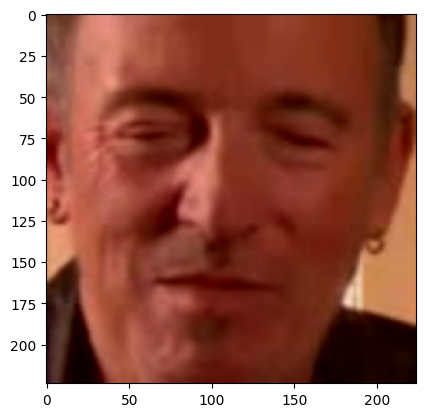

In [ ]:
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/MyDrive/DeepFake/CELEB-DF/labels.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake


# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

data_dir = "/content/drive/MyDrive/DeepFake/CELEB-DF/facecropped"
labels = pd.read_csv('/content/drive/MyDrive/DeepFake/CELEB-DF/labels.csv', names=["file", "label"])
video_files = glob.glob(os.path.join(data_dir, "*", "*.mp4"))
random.shuffle(video_files)
train_videos, valid_videos = train_test_split(video_files, test_size=0.3, random_state=42)

print("Filenames : ",video_files)

print("train : " , len(train_videos))
print("test : " , len(valid_videos))

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
print("training data : ",train_data)

val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
print("validation data : ",val_data)

train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes=2,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.5)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

model = Model().cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,224,224))).type(torch.cuda.FloatTensor))

In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-4  #0.0001

#number of epochs
num_epochs = 100

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-4)

criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
best_accuracy = 0.0
best_model_state = None

for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)

    if t_acc > best_accuracy:
        best_accuracy = t_acc
        best_model_state = model.state_dict()
        best_true = true
        best_pred = pred

if best_model_state is not None:
    torch.save(best_model_state, '/content/drive/MyDrive/DeepFake/best_model_celeb_data.pt')
    print("Best test accuracy:", best_accuracy)
    print("Model with the best accuracy saved as 'best_model.pt'.")
    print_confusion_matrix(best_true,best_pred)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/100] [Batch 140 / 142] [Loss: 0.209596, Acc: 98.94%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/100] [Batch 141 / 142] [Loss: 0.213001, Acc: 98.94%]Testing
[Batch 60 / 61]  [Loss: 0.471879, Acc: 88.93%]
Accuracy 88.93442622950819
[Epoch 2/100] [Batch 141 / 142] [Loss: 0.196930, Acc: 99.12%]Testing
[Batch 60 / 61]  [Loss: 0.974702, Acc: 82.38%]
Accuracy 82.37704918032787
[Epoch 3/100] [Batch 141 / 142] [Loss: 0.347628, Acc: 92.96%]Testing
[Batch 60 / 61]  [Loss: 0.312407, Acc: 89.75%]
Accuracy 89.75409836065573
[Epoch 4/100] [Batch 141 / 142] [Loss: 0.202243, Acc: 98.94%]Testing
[Batch 60 / 61]  [Loss: 0.312817, Acc: 92.62%]
Accuracy 92.62295081967213
[Epoch 5/100] [Batch 141 / 142] [Loss: 0.191318, Acc: 99.12%]Testing
[Batch 60 / 61]  [Loss: 0.348794, Acc: 89.34%]
Accuracy 89.34426229508196
[Epoch 6/100] [Batch 141 / 142] [Loss: 0.235647, Acc: 97.01%]Testing
[Batch 60 / 61]  [Loss: 0.237066, Acc: 91.80%]
Accuracy 91.80327868852459
[Epoch 7/100] [Batch 141 / 142] [Loss: 0.248916, Acc: 97.01%]Testing
[Batch 60 / 61]  [Loss: 0.241162, Acc: 90.16%]
Accuracy 90.1639344262295


In [ ]:
print("best validation accuracy : ",best_accuracy)

best validation accuracy :  91.80327868852459


# But we have saved the model which gave best accuracy that is 96.67 %

In [ ]:
# Sensitivity (True Positive Rate):
# Sensitivity = TP / (TP + FN)

# Specificity (True Negative Rate):
# Specificity = TN / (TN + FP)

# confusion   [ TN FP ]
# matrix      [ FN TP ]

print("Confusion Matrix is : ")
print(confusion_matrix(best_true,best_pred))

Confusion Matrix is : 
[[107   7]
 [ 13 117]]


In [ ]:
TN = confusion_matrix(best_true,best_pred)[0][0]
TP = confusion_matrix(best_true,best_pred)[1][1]
FN = confusion_matrix(best_true,best_pred)[1][0]
FP = confusion_matrix(best_true,best_pred)[0][1]

In [ ]:
TN,TP,FN,FP

(44, 43, 1, 2)

In [ ]:
Specificity = TN / (TN + FP)
Sensitivity = TP / (TP + FN)

print(f"Specificity: {Specificity}")
print(f"Sensitivity: {Sensitivity}")

Specificity: 0.9385964912280702
Sensitivity: 0.9


In [ ]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(best_true,best_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       114
           1       0.94      0.90      0.92       130

    accuracy                           0.92       244
   macro avg       0.92      0.92      0.92       244
weighted avg       0.92      0.92      0.92       244



In [ ]:
# G-Measure or G-Mean
# G-Mean = sqrt(Sensitivity * Specificity)

G_Mean = (Sensitivity * Specificity)**0.5
print(f"G-Mean: {G_Mean}")

G-Mean: 0.9190956653718171


In [ ]:
# F-Measure
# F-Measure = 2 * (Precision * Recall) / (Precision + Recall)

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

F_Measure = 2 * (Precision * Recall) / (Precision + Recall)
print(f"F-Measure: {F_Measure}")

F-Measure: 0.921259842519685


In [ ]:
# AUC Score
# ROC - receiver operating characteristic
from sklearn.metrics import roc_curve, auc, roc_auc_score
print("Roc AUC Score : ", roc_auc_score(best_true, best_pred))

Roc AUC Score :  0.9192982456140351


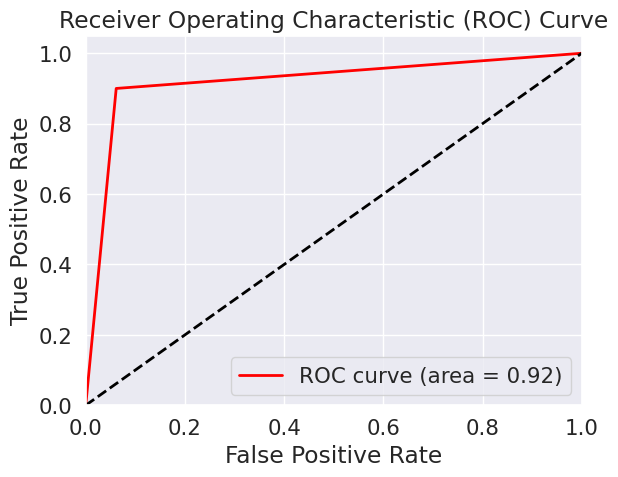

In [ ]:
# AUC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(best_true, best_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
